In [1]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
from google.colab.patches import cv2_imshow

In [2]:
!wget -nd https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat


--2020-11-05 18:52:09--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2020-11-05 18:52:09--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   162MB/s    in 0.6s    

2020-11-05 18:52:11 (162 MB

In [3]:
shape_predictor = "/content/sample_data/shape_predictor_68_face_landmarks.dat"
# image_gang = "/content/1/"

In [ ]:
import cv2
import os
dlib_annotation={}
detector = dlib.get_frontal_face_detector()

predictor = dlib.shape_predictor(shape_predictor)

for filename in os.listdir("/content/1/"):
  if filename.endswith(".jpg"):
    if (filename.split("_")[0][0] == '0'):
      id = int(filename.split("_")[0][1])
    else:
      id = int(filename.split("_")[0])

    bb={}
    lm={}

    image = cv2.imread("/content/1/"+filename)
    #print(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)

    #print(rects)
    shape = predictor(gray, rects[0])
    shape = face_utils.shape_to_np(shape)

    left_eye_x = (float(shape[36][0]) + float(shape[39][0]))/2
    left_eye_y = (float(shape[36][1]) + float(shape[39][1]))/2
    left_eye = [left_eye_x,left_eye_y]

    right_eye_x = (float(shape[42][0]) + float(shape[45][0]))/2
    right_eye_y = (float(shape[42][1]) + float(shape[45][1]))/2
    right_eye = [right_eye_x,right_eye_y]

    nose = [float(shape[30][0]),float(shape[30][1])]

    left_mouth = [float(shape[48][0]),float(shape[48][1])]
    right_mouth = [float(shape[54][0]),float(shape[54][1])]

    (x, y, w, h) = face_utils.rect_to_bb(rects[0])

    bb = {"x":float(x),"y":float(y),"w":float(w),"h":float(h)}
    lm ={'left_eye': left_eye, 'right_eye': right_eye, 'nose': nose, 'left_mouth': left_mouth, 'right_mouth': right_mouth}
    dlib_annotation[id]={"bounding_box":bb,"landmarks":lm}







In [ ]:
print(dlib_annotation[0]["landmarks"])


{'left_eye': [263.5, 286.5], 'right_eye': [419.5, 284.0], 'nose': [345.0, 351.0], 'left_mouth': [272.0, 437.0], 'right_mouth': [433.0, 433.0]}


In [ ]:

(x, y, w, h) = face_utils.rect_to_bb(rects[0])
print(x,y,w,h)


161 162 385 385


In [ ]:
import json



json = json.dumps(dlib_annotation)
f = open("dlib_annotation.json","w")
f.write(json)
f.close()

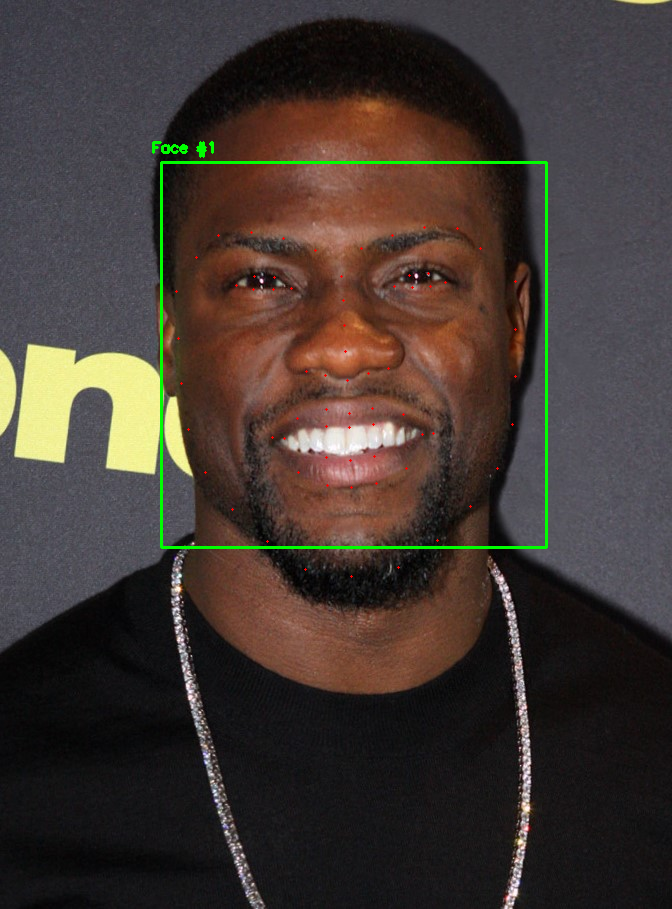

-1

In [ ]:
# loop over the face detections
from google.colab.patches import cv2_imshow
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array

	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	# loop over the (x, y)-coordinate\s for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
# show the output image with the face detections + facial landmarks
cv2_imshow(image)
cv2.waitKey(0)